# Lecture 13: General solutions (linear multivariate)

## Lecture overview

1. [Discrete time](#section1)
2. [Continuous time](#section2)

<span id='section1'></span>
## 1. Discrete time
<hr>

### Motivating example

Let's return to our model of the number of birds on two islands from Lecture 10, which was the motivation for learning linear algebra in the first place. Let's adjust the model slightly, removing foreign immigration and switching to discrete time (assuming migration, then birth, then death). 

<center>
```mermaid
graph LR;
    A1((n1)) --b1 n1--> A1;
    A1 --d1 n1--> C1[ ];
    A2((n2)) --b2 n2--> A2;
    A2 --d2 n2--> C2[ ];
    A1 --m12 n1--> A2;
    A2 --m21 n2--> A1;
    style C1 height:0px;
    style C2 height:0px;
```    
</center>
    
The number of birds on the two islands in the next time step are then

$$
\begin{aligned}
n_1(t+1) &= (n_1(t)(1-m_{12}) + n_2(t)m_{21})(1+b_1)(1-d_1) \\
n_2(t+1) &= (n_1(t)m_{12} + n_2(t)(1-m_{21}))(1+b_2)(1-d_2) \\
\end{aligned}
$$

As we noted in Lecture 10, we can write a system of linear equations (in this case recursion equations) in matrix form

$$
\begin{aligned}
\vec{n}(t+1) &= \mathbf{M}\vec{n}(t)
\end{aligned}
$$

where in this example

$$
\mathbf{M} = 
\begin{pmatrix} 
(1-m_{12})(1+b_1)(1-d_1) & m_{21}(1+b_1)(1-d_1) \\ 
m_{12}(1+b_2)(1-d_2) & (1-m_{21})(1+b_2)(1-d_2)
\end{pmatrix}
$$

The question we now want to answer is, how do the numbers of birds on the two islands change over time?

### General formulation

Instead of analyzing this specific model, let's investigate the dynamics of any system of linear equations in discrete time. We will then return to our motivating example.

If there are $n$ variables to keep track of, $x_1$, $x_2$, ..., $x_n$, then there will be $n$ recursion equations

$$
\begin{aligned}
x_1(t+1) &= m_{11} x_1(t) + m_{12} x_2(t) + \cdots + m_{1n} x_n(t) \\
x_2(t+1) &= m_{21} x_1(t) + m_{22} x_2(t) + \cdots + m_{2n} x_n(t) \\
   &\vdots \\
x_n(t+1) &= m_{n1} x_1(t) + m_{n2} x_2(t) + \cdots + m_{nn} x_n(t)
\end{aligned}
$$

e.g., in the motivating example above we have $n=2$.

These equations can be written in matrix form

$$
\begin{aligned}
\begin{pmatrix} x_1(t+1) \\ x_2(t+1) \\ \vdots \\ x_n(t+1) \end{pmatrix}
&= 
\begin{pmatrix}
         m_{11} & m_{12} & \cdots & m_{1n} \\ 
         m_{21} & m_{22} & \cdots & m_{2n}\\
         \vdots & \vdots & & \vdots\\
         m_{n1} & m_{n2} & \cdots & m_{nn} 
\end{pmatrix}
\begin{pmatrix} 
         x_1(t) \\ x_2(t) \\ \vdots \\ x_n(t) 
\end{pmatrix}\\
\vec{x}(t+1) &= \mathbf{M} \vec{x}(t)
\end{aligned}
$$

How does $\vec{x}$ change over time?

### General solution

Since this is just a multivariate version of exponential growth, we can derive the general solution by brute force iteration

$$
\begin{aligned} 
\vec{x}(t) &= \mathbf{M}\vec{x}(t-1)\\ 
&= \mathbf{M}^2\vec{x}(t-2)\\
& \vdots \\
&= \mathbf{M}^t\vec{x}(0) 
\end{aligned}
$$

However, in most cases it will be hard to compute $\mathbf{M}^t$ (if you don't believe me, try calculating even just $\begin{pmatrix} a & b \\ c & d \end{pmatrix}^3$). Fortunately there is a trick involving eigenvalues and eigenvectors.

Recall the equation for the eigenvalues, $\lambda$, and right eigenvectors, $\vec{v}$,

$$
\mathbf{M} \vec{v} = \lambda \vec{v}
$$

For our $n$-dimensional model, there will often be $n$ eigenvalues and eigenvectors that satisfy this equation (sometimes the $n$ eigenvalues are not all distinct).

We can actually write all $n$ of these equations in matrix form

$$
\begin{aligned}
\mathbf{M} \begin{pmatrix} \vec{v}_1 & \vec{v}_2 & \cdots & \vec{v}_n \end{pmatrix} 
&= \begin{pmatrix} \lambda_1 \vec{v}_1 & \lambda_2 \vec{v}_2 & \cdots & \lambda_n \vec{v}_n \end{pmatrix}\\
\mathbf{M} \mathbf{A} &= \mathbf{A} \mathbf{D}
\end{aligned}
$$

where the columns of $\mathbf{A}$ are the right eigenvectors and $\mathbf{D}$ is a diagonal matrix of the eigenvalues

$$
\mathbf{D} = 
\begin{pmatrix} 
\lambda_1 & 0 & \cdots & 0\\
0 & \lambda_2 & \cdots & 0\\
\vdots & \vdots & \vdots & \vdots\\ 
0 & 0 & \cdots & \lambda_n\\  
\end{pmatrix}
$$

Now here is the trick: multiply both sides of $\mathbf{M} \mathbf{A} = \mathbf{A} \mathbf{D}$ by $\mathbf{A}^{-1}$ on the right

$$
\begin{aligned}
\mathbf{M} \mathbf{A} &= \mathbf{A} \mathbf{D}\\
\mathbf{M} \mathbf{A}\mathbf{A}^{-1} &= \mathbf{A} \mathbf{D}\mathbf{A}^{-1}\\  
\mathbf{M} &= \mathbf{A} \mathbf{D} \mathbf{A}^{-1}
\end{aligned}
$$

!!! note

    We can only take the inverse of our $n\times n$ matrix of right eigenvectors, $\mathbf{A}$, when $\mathbf{A}$ is invertible, which requires the determinant be non-zero or, equivalently, the rows (or columns) of $\mathbf{A}$ to be linearly independent. Fortunately, in many cases the columns (the right eigenvectors) will be linearly independent. However, sometimes the right eigenvectors will not be linearly independent, which only occurs when there are less than $n$ distinct eigenvalues. When the right eigenvectors of $\mathbf{M}$ are not linearly independent we call $\mathbf{M}$ **defective**. In that case we need to derive the general solution in another way, but we won't deal with that in this class.

Subbing this alternate version of $\mathbf{M}$ into our general solution above, we see that most of the $\mathbf{A}$ and $\mathbf{A}^{-1}$ matrices cancel, leaving us with

$$
\begin{aligned} 
\vec{x}(t) &= \mathbf{M}^t\vec{x}(0)\\
&= (\mathbf{A}\mathbf{D}\mathbf{A}^{-1})^t\vec{x}(0)\\
&= (\mathbf{A}\mathbf{D}\mathbf{A}^{-1})
(\mathbf{A}\mathbf{D}\mathbf{A}^{-1}) \cdots
(\mathbf{A}\mathbf{D}\mathbf{A}^{-1})
\vec{x}(0)\\
&= \mathbf{A}\mathbf{D}(\mathbf{A}^{-1}
\mathbf{A})\mathbf{D}(\mathbf{A}^{-1}\mathbf{A}) \cdots
(\mathbf{A}^{-1}\mathbf{A})\mathbf{D}\mathbf{A}^{-1}
\vec{x}(0)\\ 
&= \mathbf{A}\mathbf{D}^t\mathbf{A}^{-1}
\vec{x}(0) 
\end{aligned}
$$

And this is great because $\mathbf{D}$ is a diagonal matrix, meaning $\mathbf{D}^t$ is easy to calculate

$$
\mathbf{D}^t = 
 \begin{pmatrix}
    \lambda_1^t & 0 & \cdots & 0 \\ 
    0 & \lambda_2^t & \cdots & 0\\
    \vdots & \vdots & & \vdots\\
    0 & 0 & \cdots & \lambda_n^t
\end{pmatrix}
$$

It would not have been so easy to find $\mathbf{M}^t$!

Note that $\mathbf{A}^{-1}$ is a matrix whose rows are the left eigenvectors of $\textbf{M}$, 
which can be seen by deriving $\mathbf{M} = \mathbf{A} \mathbf{D}\mathbf{A}^{-1}$ starting 
with the equation for the left eigenvectors $\vec{u}\mathbf{M}=\lambda\vec{u}$.

!!! note

    Another way to arrive at this general solition, $\vec{x}(t) = \mathbf{A}\mathbf{D}^t\mathbf{A}^{-1}\vec{x}(0)$, is to consider a transformation from our current coordinate system, $\vec{x}$, to another defined by $\vec{y} = \mathbf{A}^{-1}\vec{x}$. 

    If we then attempt to derive a recursion in our new coordinate system we find

    $$
    \begin{aligned}
    \vec{y}(t+1) &= \mathbf{A}^{-1}\vec{x}(t+1)\\
    &= \mathbf{A}^{-1}\mathbf{M}\vec{x}(t)\\
    &= \mathbf{A}^{-1}\mathbf{M}\mathbf{A}\vec{y}(t)\\
    &= \mathbf{A}^{-1}(\mathbf{A} \mathbf{D} \mathbf{A}^{-1})\mathbf{A}\vec{y}(t)\\
    &= \mathbf{D}\vec{y}(t)
    \end{aligned}
    $$

    Voila! In the new coordinate system we just move along each axis by a factor $\lambda_i$, just as we saw in Lecture 12. In this way the eigenvectors form a new, more convenient, coordinate system.
    
    To convert back to our original coordinate system we multiply both sides of the equation by $\mathbf{A}$ on the left and then use $\vec{y} = \mathbf{A}^{-1}\vec{x}$
    
    $$
    \begin{aligned}
    \mathbf{A}\vec{y}(t+1) &= \mathbf{A}\mathbf{D}\vec{y}(t)\\
    \vec{x}(t+1) &= \mathbf{A}\mathbf{D}\mathbf{A}^{-1}\vec{x}(t)\\
    \end{aligned}
    $$

### Long-term dynamics

A major implication from the general solution is that only if all the eigenvalues have an absolute value less than one, $|\lambda_i|<1$, will all entries of $\mathbf{D}^t$ decay to zero and hence $\vec{x}(t)$ decay to $\vec{0}$ (the equilibrium) as time increases.

Further, as time increases $\mathbf{D}^t$ will be dominated by the eigenvalue with the largest absolute value, which we will call the **leading eigenvalue**.
  
!!! note

    To see that $\mathbf{D}^t$ will be dominated by the eigenvalue with the largest absolute value as time increases, let the leading eigenvalue be $\lambda_1$ and factor it out of $\mathbf{D}^t$

    $$
    \mathbf{D}^t = \lambda_1^t 
    \begin{pmatrix} 
    1 & 0 & \cdots & 0\\
    0 & (\lambda_2/\lambda_1)^t & \cdots & 0\\
    \vdots & \vdots & \vdots & \vdots\\ 
    0 & 0 & \cdots & (\lambda_n/\lambda_1)^t\\  
    \end{pmatrix}
    $$

    Since $|\lambda_i/\lambda_1|<1$ for all $i$, for large $t$ these all go to zero and we have

    $$
    \mathbf{D}^t \approx \tilde{\mathbf{D}}^t  \equiv \lambda_1^t 
    \begin{pmatrix} 
    1 & 0 & \cdots & 0\\
    0 & 0 & \cdots & 0\\
    \vdots & \vdots & \vdots & \vdots\\ 
    0 & 0 & \cdots & 0\\  
    \end{pmatrix}
    $$

We can therefore approximate $\vec{x}(t)$ after a sufficient amount of time as 

$$
\begin{aligned}
\tilde{\vec{x}}(t) &= \mathbf{A}\tilde{\mathbf{D}}^t\mathbf{A}^{-1}\vec{x}(0)\\
&= \lambda_1^t \vec{v}_1 \vec{u}_1 \vec{x}(0)
\end{aligned}
$$

where $\vec{v}_1$ and $\vec{u}_1$ are the right and left eigenvectors associated with the leading eigenvalue, $\lambda_1$.

!!! warning

    Finding the left eigenvectors via the inverse of $\mathbf{A}$ guarantees that the eigenvectors have been scaled such that $\vec{u}_1\vec{v}_1 = 1$. If the eigenvectors have been derived in another way, make sure you scale them so that this is true, eg, make the left eigenvalue equal to $\vec{u}_1/(\vec{u}_1 \vec{v}_1)$. Otherwise the long-term approximation will be off by a constant factor.

This means that, in the long-term,

- $\vec{x}(t)$ will grow like $\lambda_1^t$, where $\lambda_1$ is the leading eigenvalue
- each variable in $\vec{x}(t)$ will oscillate around the equilibrium if $\lambda_1<0$
- $\vec{x}(t)$ will approach the right eigenvector associated with the leading eigenvalue, $\vec{v}_1$
- $\vec{x}(t)$ is weighted by a constant, $\vec{u}_1 \vec{x}(0)$, describing the "initial size" of the system

### Complex eigenvalues

The final complication to discuss is complex eigenvalues. Specifically, what is $\lambda^t$ when $\lambda = A + B i$?

To do this, we can first use some simple geometry on the complex plane (a two-dimensional space with the real part, $A$, on the x-axis and the imaginary part, $B$, on the y-axis) to show that any complex number can be written

$$
A + Bi = R (\cos(\theta) + i \sin(\theta))
$$

where $R = \sqrt{A^2 + B^2}$ is the absolute value of $\lambda$ and $\theta = \arctan(B/A)$ is the angle between $\lambda$ and the x-axis.

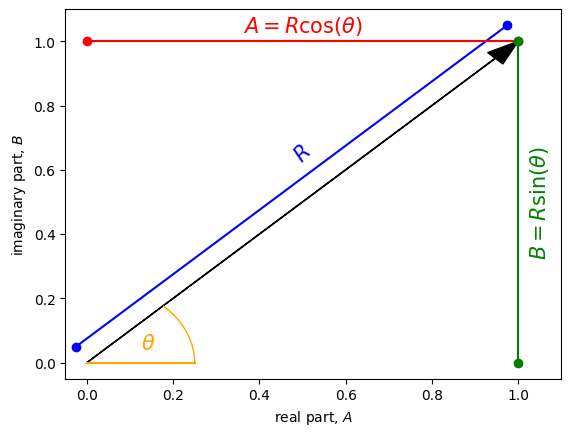

In [146]:
import matplotlib.pyplot as plt
import math

A,B = 1,1 #real and imaginary parts

fig, ax = plt.subplots()

ax.arrow(0,0,A,B, head_width=0.05, color='black', length_includes_head=True) #eigenvalue as vector in complex plane

dx = 0.05
ax.plot([0-dx/2,A-dx/2],[0+dx,B+dx],marker='o',c='b')
ax.text(A/2,B/2+3*dx,r'$R$',rotation=math.atan(B/A)*180/math.pi,c='b',fontsize=15,ha='center',va='center')

ax.plot([0,A],[B,B],marker='o',c='r')
ax.text(A/2,B+dx,r'$A=R \cos(\theta)$',c='r',fontsize=15,ha='center',va='center')

ax.plot([A,A],[0,B],marker='o',c='g')
ax.text(A+dx,B/2,r'$B=R \sin(\theta)$',c='g',fontsize=15,ha='center',va='center',rotation=90)

ax.set_xlabel('real part, $A$')
ax.set_ylabel('imaginary part, $B$')
ax.set_xlim(-dx,A+2*dx)
ax.set_ylim(-dx,B+2*dx)

dx=A/4
ax.plot([0,dx],[0,0],c='orange')
ax.add_patch(Arc((0,0), width=2*dx, height=2*dx, theta1=0, theta2=math.atan(B/A)*180/math.pi, edgecolor='orange'))
ax.text(dx/2,dx/6,r'$\theta$',fontsize=15,c='orange')

plt.show()

We then use Euler's equation, $\cos(\theta) + i \sin(\theta) = e^{i \theta}$, to write 

$$
A + Bi = R e^{i \theta}
$$

And we can now take powers of $\lambda$ 

$$
\lambda^t = R^t e^{i \theta t}
$$

### Summary 

To summarize, for any system of linear recursion equations, $\vec{x}(t+1)$, we can 

- write the general solution in terms of the eigenvalues and eigenvectors, $\vec{x}(t) = \mathbf{A}\mathbf{D}^t\mathbf{A}^{-1}\vec{x}(0)$
- define the leading eigenvalue as the one with the largest absolute value
- say that the equilibrium is stable if the leading eigenvalue is less than 1
- approximate the long-term dynamics in terms of the leading eigenvalue and its associated eigenvectors, $\vec{x}(t) = \lambda_1^t \vec{v}_1 \vec{u}_1 \vec{x}(0)$

### Motivating example revisited

Now let's return to our motivating example of birds on islands. And let's imagine we have good estimates of the parameter values (after years of tough fieldwork!): $m_{12}=m_{21}=0.1$, $b_1=b_2=0.2$, $d_1=0.1$, $d_2=0.2$. To derive the general solution, giving the number of birds on the two islands in year $t$, we first derive the eigenvalues and eigenvectors of $\mathbf{M}$. Using the techniques in Lecture 12 we find that the eigenvalues are $\lambda_1\approx1.03$ and $\lambda_2\approx0.8$. The associated right eigenvectors are $\vec{v}_1\approx\begin{pmatrix} 1 \\ 0.57 \end{pmatrix}$ and $\vec{v}_2\approx\begin{pmatrix} 1 \\ -1.57 \end{pmatrix}$. We therefore have 

$$
\mathbf{D} = \begin{pmatrix} 1.03 & 0 \\ 0 & 0.8 \end{pmatrix}
$$ 

and 

$$
\mathbf{A} = \begin{pmatrix} 1 & 1 \\ 0.57 & -1.57 \end{pmatrix}
$$

This year's census of the islands tells us that there are currently 100 birds on island 1 and 50 on island 2. Taking this as the starting point, $\vec{n}(0) = \begin{pmatrix} 100 \\ 50 \end{pmatrix}$, we can use our general solution to predict the number of birds on the two islands over time. Below we plot the predicted number of birds on the two islands over the next 100 years.

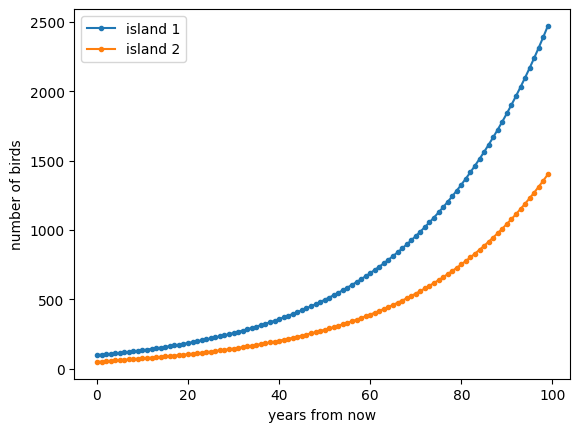

In [126]:
m12, m21, b1, b2, d1, d2 = 0.1, 0.1, 0.2, 0.2, 0.1, 0.2 #parameter values

# general solution
from sympy import *
M = Matrix([[(1-m12)*(1+b1)*(1-d1), m21*(1+b1)*(1-d1)], #matrix
            [m12*(1+b2)*(1-d2), (1-m21)*(1+b2)*(1-d2)]])
A, D = M.diagonalize() #quick way to get matrix of right eigenvectors (A) and eigenvalues (D)
n0 = Matrix([100,50]) #note this is made into a column vector automatically
nt = A*D**t*A.inv()*n0 #general solution

# plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for j in range(2): #for each island
    ax.plot([nt.subs(t,i)[j] for i in range(100)], label='island %d'%(j+1), marker=".")
ax.legend()
ax.set_xlabel('years from now')
ax.set_ylabel('number of birds')
plt.show()

We see that the population grows, which we should have expected given that the leading eigenvalue, $\lambda_1\approx1.03$, has an absolute value greater than 1. 

We also see that there are about 0.57 birds on island 2 for every 1 bird on island 1, as predicted by the right eigenvector associated with the leading eigenvector, $\vec{v}_1 \approx \begin{pmatrix} 1 \\ 0.57 \end{pmatrix}$.

More generally, our long-term prediction is $\vec{n}(t) \approx \lambda_1^t \vec{v}_1 \vec{u}_1 \vec{n}(0)$. Overlaying this approximation as black curves on the above plot shows that this works very well.

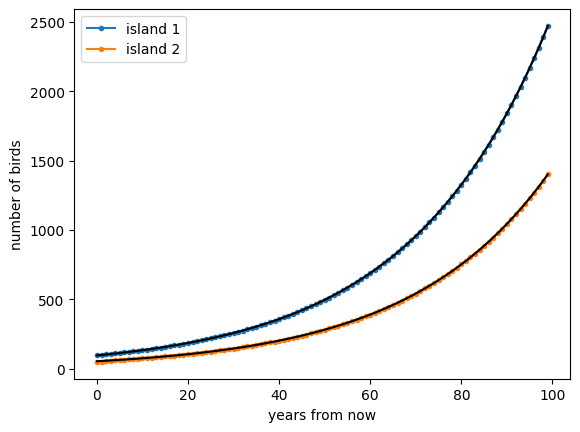

In [150]:
# long-term approximation
u1 = Matrix(1,2,A.inv()[0:2]) #left eigenvector is first row in A inverse
ntapp = l1**t * v1[0] * u1 * n0

# plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for j in range(2): #for each island
    ax.plot([nt.subs(t,i)[j] for i in range(100)], label='island %d'%(j+1), marker=".") #general solution
    ax.plot([ntapp.subs(t,i)[j] for i in range(100)], c='k') #long-term approx
ax.legend()
ax.set_xlabel('years from now')
ax.set_ylabel('number of birds')
plt.show()

<span id='section2'></span>
## 2. Continuous time
<hr>

Now let's consider a system of linear equations in continuous time, which we can write in matrix form as

$$
\frac{\mathrm{d}\vec{x}}{\mathrm{d}t} = \mathbf{M} \vec{x}
$$
  
### General solution

Just as in the univariate case of exponential growth, the general solution is simply 

$$
\vec{x}(t) = e^{\mathbf{M}t}\vec{x}(0)
$$

But now we have $e$ to the power of a *matrix*, and $e^{\mathbf{M}t} = \sum_{i=0}^{\infty} \mathbf{M}^i t^i / i!$ is complicated!

Fortunately we can use the same transform as in the discrete time case, $\vec{y}=\mathbf{A}^{-1}\vec{x}$, to write the general solution as 

$$
\vec{x}(t) = \mathbf{A} e^{\mathbf{D}t} \mathbf{A}^{-1}\vec{x}(0)
$$

This is much simpler because $e^{\mathbf{D}t}$ is just

$$
e^{\mathbf{D}t} = \begin{pmatrix}
e^{\lambda_1 t} & 0 & \cdots & 0\\
0 & e^{\lambda_2 t} & \cdots & 0\\
\vdots & \vdots & \vdots & \vdots\\
0 & \cdots & 0 & e^{\lambda_n t}
\end{pmatrix}
$$

### Long-term dynamics

From this general solution we see that the system will approach equilibrium, $\hat{\vec{x}} = \vec{0}$, only if all the entries of $e^{\mathbf{D}t}$ approach zero as time increases, which requires that all the eigenvalues are negative.

Taking $\lambda_1$ to be the eigenvalue with the largest value, which we will call the **leading eigenvalue**, we also see that after sufficient time $e^{\mathbf{D}t}$ becomes dominated by this entry

$$
e^{\mathbf{D}t} \approx 
\begin{pmatrix}
e^{\lambda_1 t} & 0 & \cdots & 0\\
0 & 0 & \cdots & 0\\
\vdots & \vdots & \vdots & \vdots\\
0 & \cdots & 0 & 0
\end{pmatrix}
$$

implying that the long-term dynamics can be approximated by 

$$
\vec{x}(t) \approx e^{\lambda_1 t} \vec{v}_1 \vec{u}_1 \vec{x}(0)
$$

where $\vec{v}_1$ and $\vec{u}_1$ are the right and left eigenvectors associated with the leading eigenvalue, $\lambda_1$.

### Complex eigenvalues

When we have complex eigenvalues we can again use Euler's equation to write

$$
\begin{aligned}
e^{\lambda t} &= e^{(A + Bi) t}\\
&= e^{At}e^{Bti}\\
&= e^{At}(\cos(Bt) + i\sin(Bt))
\end{aligned}
$$

Because both $\cos(Bt)$ and $\sin(Bt)$ are bounded (between -1 and 1), whether $e^{\lambda t}$ grows or shrinks in long term depends only on the real part, $A$. So, in contrast to discrete time, when determining the leading eigenvalue in continuous time we only have to consider the real parts of the eigenvalues.

### Summary

In summary, for any system of linear differential equations, $\frac{\mathrm{d}\vec{x}}{\mathrm{d}t}$, we can 

- write the general solution in terms of the eigenvalues and eigenvectors, $\vec{x}(t) = \mathbf{A} e^{\mathbf{D}t} \mathbf{A}^{-1}\vec{x}(0)$
- define the leading eigenvalue as the eigenvalue with the largest real part
- say that the equilibrium is stable if the real part of the leading eigenvalue is negative
- approximate the long-term dynamics in terms of the leading eigenvalue and its associated eigenvectors, $\vec{x}(t) \approx e^{\lambda_1 t} \vec{v}_1 \vec{u}_1 \vec{x}(0)$

### Example

Let's consider a different example here in continuous time. Instead of thinking about birds on islands, let's think about a model of sexual selection. We will model the mean value of a male trait, $\bar{z}$, such as the length of a birds tail, and the mean value of female preference for that trait, $\bar{p}$ (if $\bar{p}>0$ females tend to prefer larger male traits, if $\bar{p}<0$ females tend to prefer smaller male traits). We assume the optimal male trait value in the absence of sexual selection is $\theta$, i.e., natural selection always pushes $\bar{z}$ towards $\theta$ (we'll take $\theta=0$, meaning $\bar{z}$ is measured relative to the optimum). We assume female choice is costly, i.e., natural selection always pushes $\bar{p}$ towards 0. Finally we will assume that male traits and female preference share some genetic basis, meaning that they will covary (e.g., there may be some alleles that increase the trait value when in males and increase the preference when in females, causing positive covariance). This covariance means that a change in male trait will cause a change in female preference, and vice-versa.

We can describe the dynamics of $\bar{z}$ and $\bar{p}$ with a system of linear differential equations

$$
\begin{align}
\frac{\mathrm{d}\bar{z}}{\mathrm{d}t} = G_z (a \bar{p} - c \bar{z}) - B b \bar{p}\\
\frac{\mathrm{d}\bar{p}}{\mathrm{d}t} = B (a \bar{p} - c \bar{z}) - G_p b \bar{p} \\
\end{align}
$$

where $G_z$ and $G_p$ are the amounts of genetic variation in male traits and female preference (this is the "fuel" of evolution, so the rates of evolution are proportional to these variances), $B$ is the covariance between male traits and female preference, $a$ is the strength of sexual selection, and $c$ and $b$ are the strengths of natural selection on male traits and female preference.

Choosing some parameter values and plotting the general solution, we see the mean male trait and mean female preference cycle over time, decaying towards zero.

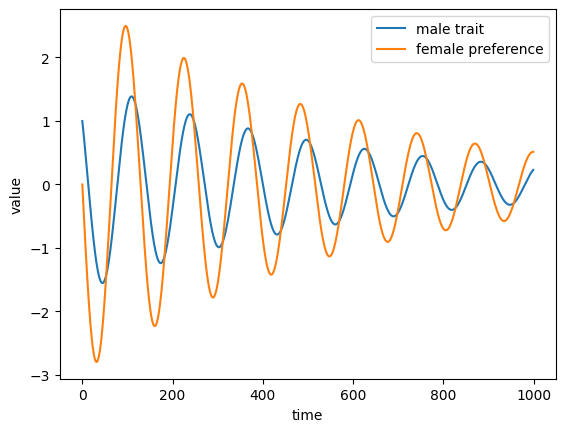

In [168]:
Gz, Gp, B, a, b, c, z0, p0, tmax = 0.15, 0.8, 0.32, 0.95, 0.3, 0.45, 1, 0, 1000 #parameter values

# general solution
from sympy import *
M = Matrix([[-Gz*c, Gz*a-b*B],
            [-B*c, -Gp*b+a*B]])
A, D = M.diagonalize() #quick way to get matrix of right eigenvectors (A) and eigenvalues (D)
n0 = Matrix([z0,p0]) #note this is made into a column vector automatically
nt = A*exp(D*t)*A.inv()*n0 #general solution

# plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot([re(nt.subs(t,i)[0]) for i in range(tmax)], label='male trait') #need to remove the imaginary part because of numerical error
ax.plot([re(nt.subs(t,i)[1]) for i in range(tmax)], label='female preference')
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('value')
plt.show()

This cycling occurs because initially the mean male trait is positive but there is no mean female preference. This implies that both natural and sexual selection favour smaller male traits, causing the mean to decline. But because of a correlated response, female preference also declines, favouring male traits less than 0. Eventually female preference becomes too costly and begins to increase back toward zero. This causes a correlated increase in the male trait, and so on. 

With these parameter values the eigenvalues are $\lambda \approx -0.002 \pm 0.05 i$.

We could therefore have predicted this cycling based on these eigenvalues, as they are complex.

We could also have predicted the eventual decay to zero (the equilibrium), as the real parts of both eigenvalues are negative.

In this case the two eigenvalues have the same real part and therefore there is no one leading eigenvalue, meaning that we cannot use our long-term approximation, $\vec{x}(t) \approx e^{\lambda_1 t} \vec{v}_1 \vec{u}_1 \vec{x}(0)$.